# Imports

In [1]:
import numpy as np

import librosa.display as ld
import librosa

import matplotlib.pyplot as plt

# 1 - Input processing

In [2]:
from IPython.display import Audio
Audio('audiosPath/discovery.wav')

# 2 - Original code

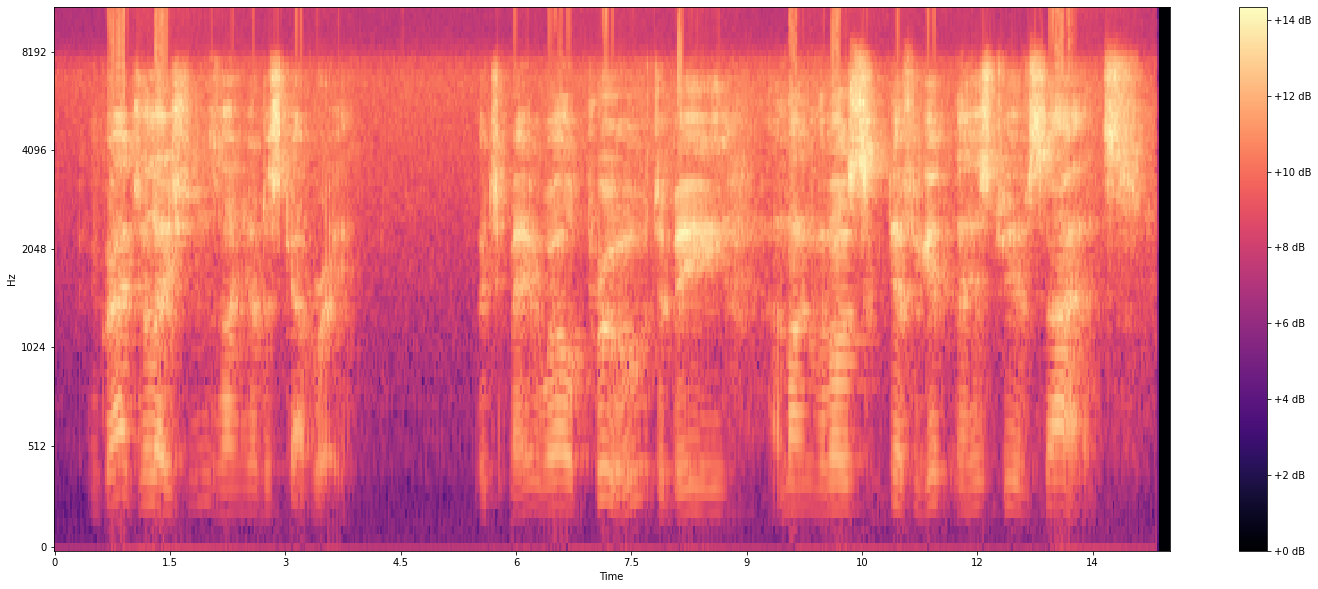

In [12]:
samples, sampling_rate = librosa.load(
    path = 'audiosPath/discovery.wav',
)

preem_coef = 0.97
samples *= 32768 # no idea why!

samples[1:] = samples[1:] - preem_coef * samples[:-1]
samples[0] *= (1 - preem_coef)

# Each frame of audio is windowed by window of length win_length and then padded with zeros to match n_fft.

n_fft = 512 # corresponds to 23 miliseconds
window_stride = 0.010
window_size = 0.023
window = 'hamming'

hop_length = int(sampling_rate * window_stride)
win_length = int(sampling_rate * window_size)

S = librosa.stft(
    y = samples, 
    n_fft = n_fft, 
    hop_length = hop_length, 
    win_length = win_length, 
    window = window, 
    center = False
)

D = np.abs(S)

n_mels = 80
lowfreq = 0
highfreq = sampling_rate / 2

mel_spectrogram = librosa.feature.melspectrogram(
    S = D, 
    sr = sampling_rate, 
    n_mels = n_mels, 
    fmin = lowfreq, 
    fmax = highfreq, 
    norm = None,
)

mel_spectrogram = np.log(np.maximum(1, mel_spectrogram))

plt.figure(figsize=(25, 10))

librosa.display.specshow(
    mel_spectrogram, 
    x_axis = "time",
    y_axis = "mel", 
    sr = sampling_rate,
    )

plt.colorbar(format="%+2.f dB")
plt.show()

# 3 -  Tests

In [2]:
example_path = 'audiosPath/discovery.wav'

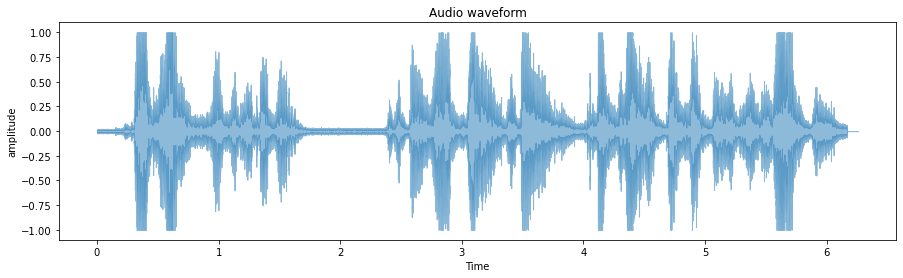

In [4]:
plt.figure(figsize = (15, 4))

samples, sampling_rate = librosa.load(
    path = example_path,
)

librosa.display.waveshow(
  samples, 
  alpha = 0.5
)

plt.ylabel("amplitude")
plt.title("Audio waveform")
plt.show()

/tmp/ipykernel_15581/3362170821.py:13: FutureWarning: Pass y=[-0.00860596 -0.00909424 -0.00128174 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(


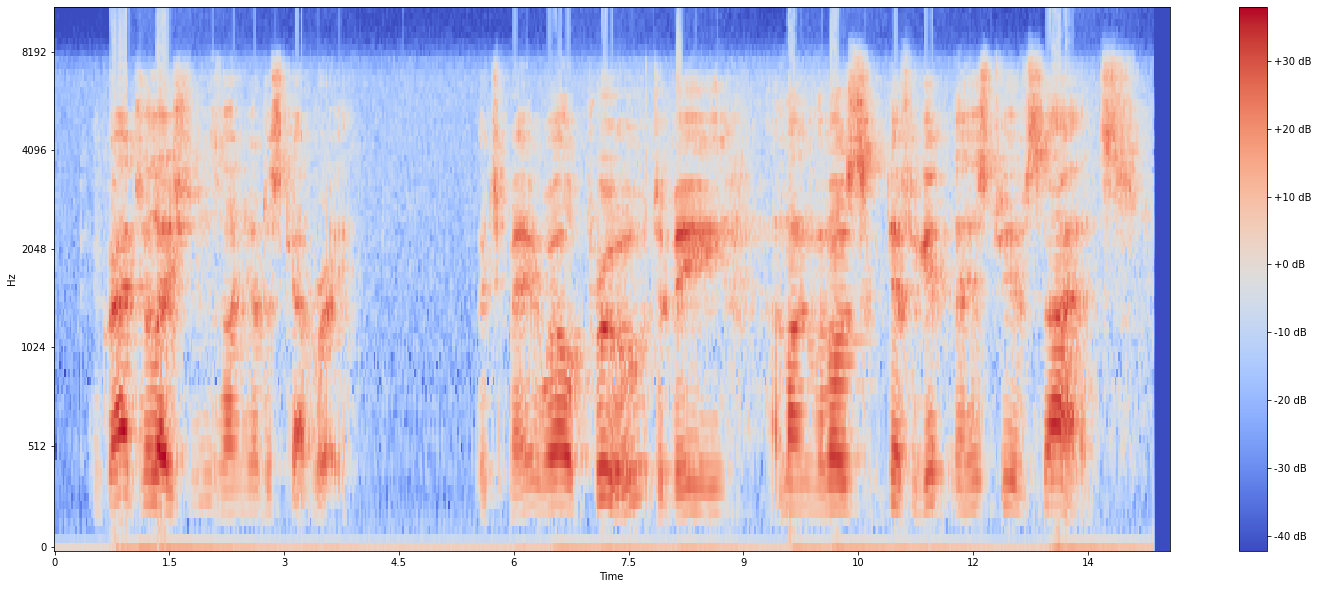

In [5]:
samples, sampling_rate = librosa.load(example_path)

n_fft = 512 # corresponds to 23 miliseconds
window_stride = 0.010
window_size = 0.023
window = 'hamming'
n_mels = 80
lowfreq = 0
highfreq = sampling_rate / 2
hop_length = int(sampling_rate * window_stride)
win_length = int(sampling_rate * window_size)

mel_spectrogram = librosa.feature.melspectrogram(
    samples, 
    sr = sampling_rate, 
    n_fft = n_fft, 
    hop_length = hop_length, 
    n_mels = n_mels,
    fmin = lowfreq, 
    fmax = highfreq, 
    norm = None,
    )

plt.figure(figsize=(25, 10))

librosa.display.specshow(
    librosa.power_to_db(mel_spectrogram), 
    x_axis = "time",
    y_axis = "mel", 
    sr = sampling_rate,
    )

plt.colorbar(format="%+2.f dB")
plt.show()